### 전력사용량 예측 문제

주어진 데이터를 이용하여, EDA를 하는 문제를 풀어봅니다.
기본과정 과제와 다르게 정답이 정해져 있는 문제는 아닙니다.

분석 니즈에 맞는 코드를 작성하여 여러가지 인사이트를 찾아봅니다.



- Dataset Source : https://dacon.io/competitions/official/236125/data

In [1]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터를 불러옵니다.
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
building_info = pd.read_csv('./data/building_info.csv')
print(train.shape, test.shape, building_info.shape)

(204000, 10) (16800, 7) (100, 7)


In [24]:
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### Q1. 주어진 train, test 데이터의 기본정보를 확인하세요.

- 기본정보는 다음과 같습니다.

- row, column 크기
- 사용 메모리 크기

In [12]:
# Q1.
# row, column 크기
print("train 데이터의 row, column 크기:", train.shape)
print("test 데이터의 row, column 크기:", test.shape)
# 사용 메모리 크기
print("------------------------------------------------------------")
print("[train 데이터의 사용 메모리 크기]")
print(train.info())
print("------------------------------------------------------------")
print("[test 데이터의 사용 메모리 크기]")
print(test.info())

train 데이터의 row, column 크기: (204000, 10)
test 데이터의 row, column 크기: (16800, 7)
------------------------------------------------------------
[train 데이터의 사용 메모리 크기]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB
None
------------------------------------------------------------
[test 데이터의 사용 메모리 크기]
<class 'pandas.core.frame.DataFrame'>

### Q2. train 데이터를 이용해서 시간(x축)에 따른 전력사용량(y축) 변화를 나타내는 그래프를 그리세요.

- sns.lineplot을 추천합니다.

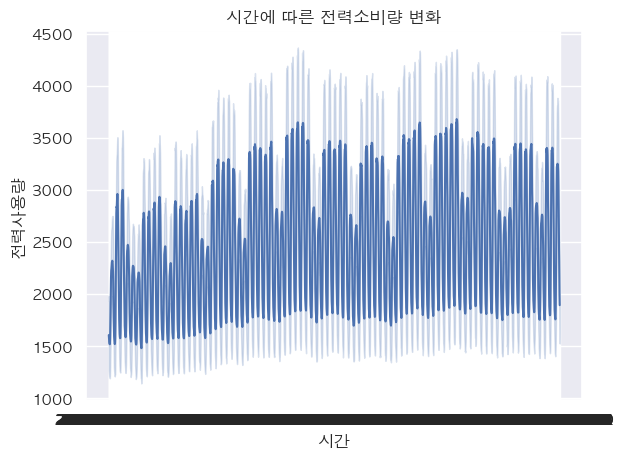

In [25]:
# Q2.
data = train[['일시', '전력소비량(kWh)']]
sns.lineplot(x='일시', y='전력소비량(kWh)', data=data)

plt.title('시간에 따른 전력소비량 변화')
plt.xlabel('시간')
plt.ylabel('전력사용량')

plt.show()

### Q3. building_info에 있는 결측치들은 '-'로 표기되어 있습니다. 해당 값들을 모두 0으로 변환하세요.

- loc를 사용하여 값을 변경할 수 있습니다.

In [27]:
# Q3.
building_info.loc[building_info['연면적(m2)'] == '-', '연면적(m2)'] = 0
building_info.loc[building_info['냉방면적(m2)'] == '-', '냉방면적(m2)'] = 0
building_info.loc[building_info['PCS용량(kW)'] == '-', 'PCS용량(kW)'] = 0
building_info.loc[building_info['태양광용량(kW)'] == '-', '태양광용량(kW)'] = 0
building_info.loc[building_info['ESS저장용량(kWh)'] == '-', 'ESS저장용량(kWh)'] = 0
building_info.loc[building_info['PCS용량(kW)'] == '-', 'PCS용량(kW)'] = 0

building_info

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,0,0,0
1,2,건물기타,122233.47,99000.00,0,0,0
2,3,건물기타,171243.00,113950.00,40,0,0
3,4,건물기타,74312.98,34419.62,60,0,0
4,5,건물기타,205884.00,150000.00,0,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,0,0,0
96,97,호텔및리조트,55144.67,25880.00,0,0,0
97,98,호텔및리조트,53578.62,17373.75,0,0,0
98,99,호텔및리조트,53499.00,40636.00,0,0,0


### Q4. train data와 building_info의 데이터를 병합하세요. 병합 기준은 건물 번호입니다.

- pd.merge 함수를 활용하세요.

In [30]:
# Q4.
merged_data = pd.merge(train, building_info, on='건물번호')
merged_data

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.00,39570.00,0,0,0
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.00,39570.00,0,0,0
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.00,39570.00,0,0,0
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.00,39570.00,0,0,0
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.00,39570.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,0,0,0
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,0,0,0
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,0,0,0
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,0,0,0


#### ---- Q4 이후에 사용하는 모든 train 데이터는 Q4에서 병합된 데이터를 기준으로 합니다. ----

### Q5. 건물유형별 전력사용량 패턴을 그려보세요.

- 패턴을 볼 때는 histplot, scatterplot, lineplot을 주로 사용합니다.

- 사용하기에 적절한 plot을 선택하고 그려보세요.

- 데이터는 loc 또는 groupby를 통해서 묶을 수 있습니다.

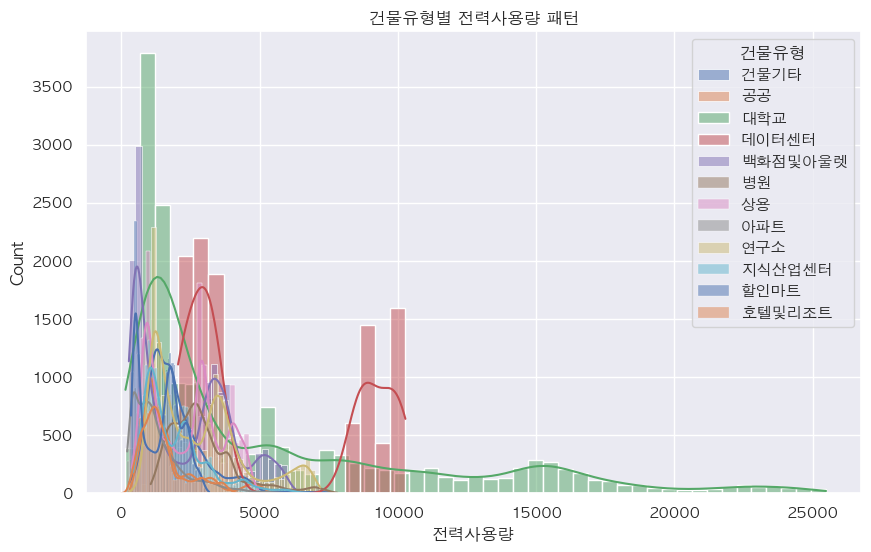

In [32]:
# Q5.
# 건물유형별로 그룹화
grouped_data = merged_data.groupby('건물유형')

# 건물유형별 전력사용량 분포
plt.figure(figsize=(10, 6))
for name, group in grouped_data:
    sns.histplot(group['전력소비량(kWh)'], label=name, kde=True)
plt.legend(title='건물유형')
plt.xlabel('전력사용량')
plt.title('건물유형별 전력사용량 패턴')
plt.show()

### Q6. train 데이터의 결측치들을 모두 선형 보간법을 이용하여 채우세요.

- pd.Series.interpolate() 를 활용하세요.

In [38]:
# Q6.
# 결측치를 선형 보간법을 이용하여 채우기
train['기온(C)'] = train['기온(C)'].interpolate(method='linear')
train['강수량(mm)'] = train['강수량(mm)'].interpolate(method='linear')
train['풍속(m/s)'] = train['풍속(m/s)'].interpolate(method='linear')
train['습도(%)'] = train['습도(%)'].interpolate(method='linear')
train['일조(hr)'] = train['일조(hr)'].interpolate(method='linear')
train['일사(MJ/m2)'] = train['일사(MJ/m2)'].interpolate(method='linear')

train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,0.1,0.9,86.0,0.5,0.0,881.04
203996,100_20220824 20,100,20220824 20,22.4,0.1,1.3,86.0,0.0,0.0,798.96
203997,100_20220824 21,100,20220824 21,21.3,0.1,1.0,92.0,0.0,0.0,825.12
203998,100_20220824 22,100,20220824 22,21.0,0.1,0.3,94.0,0.0,0.0,640.08


### Q7. train data의 상관계수 행렬을 출력하세요.

- 상관계수 행렬 자체(dataframe)과 해당 행렬을 heatmap으로 표현해보세요.

In [49]:
# Q7.
train = train.replace('-', pd.NA)
train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d %H')

# 상관계수 행렬 자체(dataframe)
#correlation_matrix = train.corr()
#print("상관계수 행렬:")
#print(correlation_matrix)

# heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title("상관계수 히트맵")
#plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 1200x800 with 0 Axes>